<h2 style='text-align: center;'>AIPM -  MiniProject - CH22M503</h2>

<h3 style='text-align: center;'>Author - Aloy Banerjee</h3>
<h3 style='text-align: center;'>Roll No. CH22M503</h3>

### Problem - 2: Particle filter
######  Implement the Particle Filter to estimate the level of water in the 4 tanks present in the Quadruple tank experiment, as discussed in class. Follow the same procedures as mentioned in Problem 1.

#### Importing Library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the data

In [2]:
# Load the data from an Excel file
tank_measurement_data = pd.read_excel('Link 2 Measurements.xlsx')
display(tank_measurement_data)

h1         h2        h3        h4
0      12.400000  12.700000  1.800000  1.400000
1      12.404928  12.700618  1.792881  1.400301
2      12.409478  12.701239  1.786060  1.400592
3      12.413670  12.701863  1.779526  1.400873
4      12.417521  12.702490  1.773266  1.401145
...          ...        ...       ...       ...
9996   12.262968  12.783158  1.633941  1.409045
9997   12.262968  12.783158  1.633941  1.409045
9998   12.262968  12.783158  1.633941  1.409045
9999   12.262968  12.783158  1.633941  1.409045
10000  12.262968  12.783158  1.633941  1.409045

[10001 rows x 4 columns]

#### Seperate each tank measurement 

In [3]:
tank1_measurements = tank_measurement_data['h1'].values
tank2_measurements = tank_measurement_data['h2'].values
tank3_measurements = tank_measurement_data['h3'].values
tank4_measurements = tank_measurement_data['h4'].values

#### Display the result

In [5]:
print(tank1_measurements)
print(tank2_measurements)
print(tank3_measurements)
print(tank4_measurements)

[12.4        12.40492766 12.40947845 ... 12.26296752 12.26296752
 12.26296752]
[12.7        12.70061798 12.70123915 ... 12.7831584  12.7831584
 12.7831584 ]
[1.8        1.79288086 1.78606001 ... 1.63394113 1.63394113 1.63394113]
[1.4        1.40030108 1.40059211 ... 1.4090447  1.4090447  1.4090447 ]


In [6]:
np.random.seed(100)
# Create a time vector
time_steps = np.arange(len(tank1_measurements))
time_steps_10000 = np.arange(len(tank1_measurements) - 1)
# Measurements from the system
measurements = np.array([tank1_measurements, tank2_measurements, tank3_measurements, tank4_measurements]).T
# Variable holding the number of tanks for this excercise
num_tanks = measurements.shape[1]
# Number of measurement availables
num_measurements = len(measurements)
# particles for our particle filter
number_of_particles = 1000 
# replace this with your method for initializing particles
initial_particles = np.random.rand(number_of_particles, num_tanks)  
# start with equal confidence in all particles : Initialize weights
initial_weights = np.ones(number_of_particles) / number_of_particles
# Variable to store the number of voltage source in the excercise
num_voltage_source = 2

#### Common function

In [7]:
def plot_filterwise_tank_data(subplot_num, time_steps, original_data, filter_results, tank_measurements, tank_name, marker):
    
    # Create a subplot for the current tank
    plt.subplot(2, 2, subplot_num) 
    # Plot the original tank data
    plt.plot(time_steps, original_data, label='Original Data', color='#9A0EEA')  
    # Plot the filter results
    plt.plot(time_steps, filter_results, label='Filter Results', color='red')  
    # Plot the tank measurements
    plt.scatter(time_steps, tank_measurements, label='Measurements', color='#76FF7B', marker=marker, s = 30) 
    # Set the x-axis label
    plt.xlabel('Time Steps')  
    # Set the y-axis label
    plt.ylabel('Tank Level') 
    # Set the title for the subplot
    plt.title(tank_name)  
    # Show the legend
    plt.legend()

#### Common variables used for 2nd approach of Particle filter implementation

In [12]:
np.random.seed(100)
h0 = tank_measurement_data.to_numpy()[0,:]
Ar = [28, 32, 28, 32]
ar = [0.071, 0.057, 0.071, 0.057]
g = 981.2
gamma_1, gamma_2= 0.7, 0.6
k1, k2 = 3.33, 3.35
kc=0.5
gamma_arr = [gamma_1, gamma_2]
k_arr = [k1, k2]
control_input = np.array([[3], [3]])
v_arr = control_input
x0 = h0
n = num_tanks
P0 = np.eye(num_tanks) * 10**5
z = np.vstack((tank1_measurements, tank2_measurements)).T
N = 2000
delta_t = 0.1
observation_matrix = np.array([[kc, 0, 0, 0], [0, kc, 0, 0]])
epsilon = 1e-10
total_data_length = 2000

#### Modified variables 

In [31]:
# System parameters
np.random.seed(30)
N = 10000 # Number of particle
#Process Noise covariance
process_noise_covariance_Q = np.eye(num_tanks) * 1
# Measurement noise covariance - Hyperparameter
measurement_noise_cov_init_R = np.eye(num_voltage_source)*0.501
total_data_length = 10000
x0 = h0

#### Additonal variable assignment and calculation - 2nd Approach

In [32]:
# Initialize x_post with the initial state x0
x_post = x0
# Calculate the Cholesky decomposition of the covariance matrix P0
L = np.linalg.cholesky(P0)
# Generate a new set of particles (x0) around the current state (x_post) using random samples
# from a multivariate normal distribution with covariance L and mean x0
x0 = (np.tile(x0, (N, 1)).T + (np.random.randn(N, n).dot(L).T)/N).T
# Update x1_post, x2_post, x3_post, x4_post with the first, second, third, and fourth columns of x0 respectively
x1_post, x2_post, x3_post, x4_post = x0[:, 0], x0[:, 1], x0[:, 2], x0[:, 3]
# Generate a new set of random samples w from a multivariate normal distribution 
# with covariance matrix cholesky(process_noise_covariance_Q) and mean 0
w = np.linalg.cholesky(process_noise_covariance_Q).dot(np.random.randn(n, N)/N)
# Update w1, w2, w3, w4 with the first, second, third, and fourth rows of w respectively
w1, w2, w3, w4 = w[0, :], w[1, :], w[2, :], w[3, :]
# Update x1_post, x2_post, x3_post, x4_post by adding corresponding elements of w1, w2, w3, w4 to them
x1_post, x2_post, x3_post, x4_post = x1_post + w1, x2_post + w2, x3_post + w3, x4_post + w4
# Initialize arrays x1_post_data, x2_post_data, x3_post_data, x4_post_data with zeros
x1_post_data, x2_post_data, x3_post_data, x4_post_data = np.zeros(total_data_length), np.zeros(total_data_length), np.zeros(total_data_length), np.zeros(total_data_length)

#### Particle filter implmentation - 2nd Approach

In [33]:
for initalLoop in range(N):
    # Calculate the predicted values for the state variables at time step (initalLoop) using a predictive model
    x1_pri = x1_post + delta_t*(-ar[0]/Ar[0]*np.sqrt(2*g*np.abs(x1_post)) + ar[2]/Ar[0]*np.sqrt(2*g*np.abs(x3_post)) + (gamma_arr[0]*k1*v_arr[0])/Ar[0] + w1)
    x2_pri = x2_post + delta_t*(-ar[1]/Ar[1]*np.sqrt(2*g*np.abs(x2_post)) + ar[3]/Ar[1]*np.sqrt(2*g*np.abs(x4_post)) + (gamma_arr[1]*k1*v_arr[1])/Ar[1] + w2)
    x3_pri = x3_post + delta_t*(-ar[2]/Ar[2]*np.sqrt(2*g*np.abs(x3_post)) + (1 - gamma_arr[1])*k2*v_arr[1]/Ar[2] + w3)
    x4_pri = x4_post + delta_t*(-ar[3]/Ar[3]*np.sqrt(2*g*np.abs(x4_post)) + (1 - gamma_arr[0])*k1*v_arr[0]/Ar[3] + w4)

    # Calculate the absolute values of the state variables
    x_pri = np.abs(np.array([x1_pri, x2_pri, x3_pri, x4_pri]))
    x1_pri, x2_pri, x3_pri, x4_pri = np.abs(x1_pri), np.abs(x2_pri), np.abs(x3_pri), np.abs(x4_pri)
    
    h_try = tank_measurement_data.to_numpy()[initalLoop,:]
    # Initialize z1 and z2 with h0 values
    z1, z2 = h_try[0], h_try[1]

    # Create true state vector z_true from h0 values and repeat it N times
    z_true = np.tile([z1, z2], (N, 1)).T

    # Estimate state vector z_est using an observation matrix and the predicted state vector x_pri
    z_est = observation_matrix.dot(x_pri)

    # Calculate the error between the true and estimated state vectors
    error = z_true - z_est

    # Calculate the weights for the particles using the error and the measurement noise covariance matrix
    q = np.zeros(N)
    for i in range(N):
        q[i] = np.exp(-0.5 * error[:, i].T @ np.linalg.inv(measurement_noise_cov_init_R) @ error[:, i])

    # Normalize the weights to make them sum up to 1
    wt = np.array([q[i] / np.sum(q) if np.sum(q) != 0 else q[i] / (np.sum(q)+epsilon) for i in range(N)])

    # Calculate the cumulative sum of the weights as process_noise_covariance_Q
    process_noise_covariance_Q = np.cumsum(wt)

    # Generate random values and use them to determine the indices of particles (particles resampling step)
    T = np.linspace(0, 1-1/N, N) + np.random.rand()/N
    i = 0
    j = 0
    indx = np.zeros(N, dtype=int)
    while i < N and j < N:
        while T[i] < process_noise_covariance_Q[j] and i < N-1 and j < N-1:        
            j += 1
        indx[i] = j
        x1_post[i], x2_post[i], x3_post[i], x4_post[i] = x1_pri[j], x2_pri[j], x3_pri[j], x4_pri[j]
        i += 1

    # Calculate the posterior estimates for each state variable using weighted averages
    x1_post_data[initalLoop] = np.sum(wt*x1_post.reshape(1,-1))
    x2_post_data[initalLoop] = np.sum(wt*x2_post.reshape(1,-1))
    x3_post_data[initalLoop] = np.sum(wt*x3_post.reshape(1,-1))
    x4_post_data[initalLoop] = np.sum(wt*x4_post.reshape(1,-1))

#### Visualization of the convergence with actual estimates - 2nd Approach

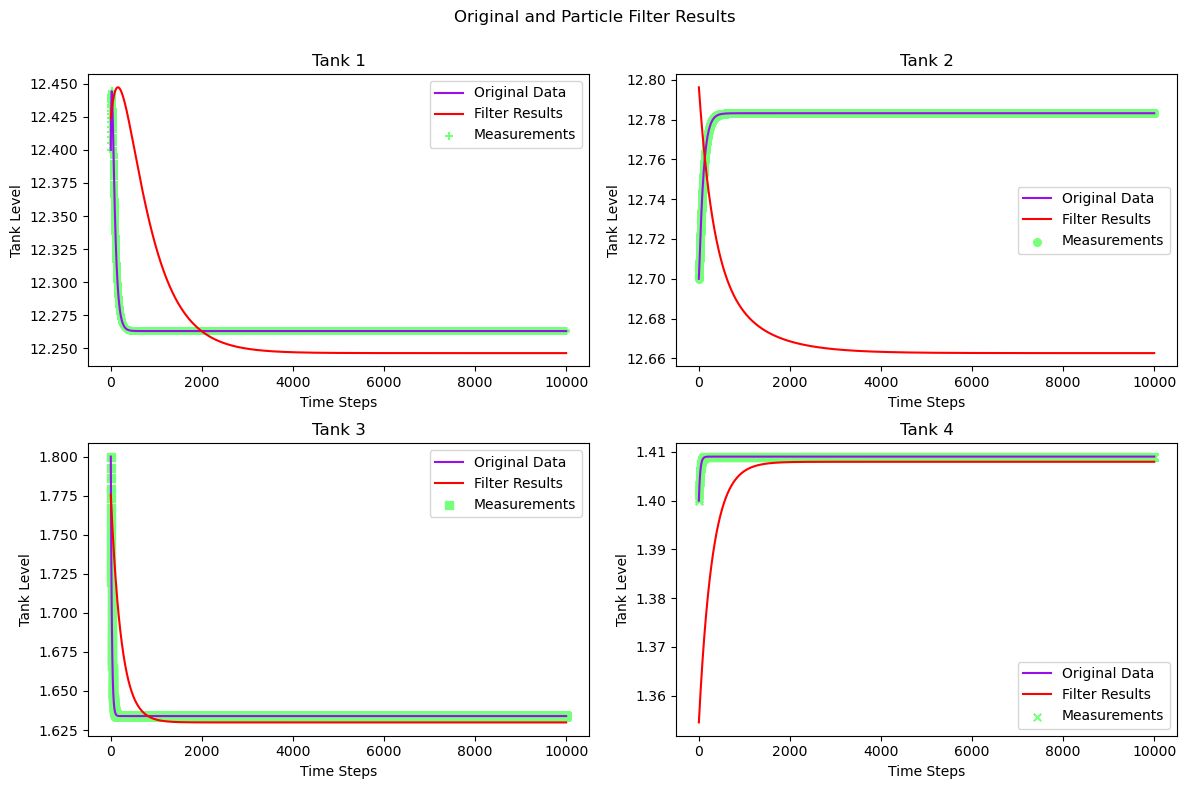

In [37]:
# Initialize the plot for original data and Particle filter results
plt.figure(figsize=(12, 8))
plt.suptitle('Original and Particle Filter Results')

plot_filterwise_tank_data(1, range(total_data_length), tank1_measurements[:total_data_length], x1_post_data, tank1_measurements[:total_data_length], 'Tank 1', '+')
plot_filterwise_tank_data(2, range(total_data_length), tank2_measurements[:total_data_length], x2_post_data, tank2_measurements[:total_data_length], 'Tank 2', 'o')
plot_filterwise_tank_data(3, range(total_data_length), tank3_measurements[:total_data_length], x3_post_data, tank3_measurements[:total_data_length], 'Tank 3', 's')
plot_filterwise_tank_data(4, range(total_data_length), tank4_measurements[:total_data_length], x4_post_data, tank4_measurements[:total_data_length], 'Tank 4', 'x')

# Adjust the subplot layout, so the plots do not overlap
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()